In [91]:
import numpy as np
import math
import random

Forward-Backward gives marginal probability for each individual state, Viterbi gives probability of the most likely sequence of states

The Viterbi algorithm and the Forward-Backward algorithm (Baum-Welch) calculate different things. The Viterbi algorithm finds only the most likely path and its corresponding probability (which can then be used as a good approximation of the total probability that the model will generate the given observation sequence). Baum-Welch's algorithm calculates more than that: it does not consider a single path but all possible paths; and, it calculates the probability of being in a given state at a given time (called "state occupation"), summed on all possible paths that pass through that state at the given time.

We can indeed use either algorithm to form the model, but the Baum-Welch algorithm calculates the exact occupancy of the state while the Viterbi algorithm only calculates an approximation. The Baum-Welch is more accurate and we expect it to lead to better estimates of the model's parameters (which it does in fact - how could you demonstrate this empirically?) The Viterbi algorithm can be used to drive the model, as noted above, but it will give slightly lower (i.e., less likely) estimates for the model parameters. Because it is much faster than Baum-Welch, it is often used to quickly bring the model parameters to the most probable values, before refining them with Baum-Welch.

So, Forward-Backward gives marginal probability for each individual state, Viterbi gives probability of the most likely sequence of states

Set transition (M x M) and emission (M x K) matrices and beginning distribution
(vector of length M) and build the HMM for unfair casino example

HMM random generator: generate a sequence x of length L given the model parameters.

In [92]:
L = 300
a = np.array([[0.95, 0.05], [0.1, 0.9]], float)
e = np.array([[1 / 6, 1 / 6, 1 / 6, 1 / 6, 1 / 6, 1 / 6], [0.1, 0.1, 0.1, 0.1, 0.1, 0.5]], float)

def HMM(e, a, L):
    if 0 <= random.random() < (2 / 3):
        D = 0
    else:
        D = 1
    path = []
    s = []
    for i in range(L):
        X = random.random()
        K = random.random()
        if (D == 0) and (X < 0.05):
            D = 1
        elif (D == 1) and (X < 0.1):
            D = 0
        if D == 0:
            s.append("0")
            path.append(random.randint(1, 6))
        elif D == 1:
            s.append("1")
            if K < 0.5:
                path.append(6)
            else:
                path.append(random.randint(1, 5))
    return(path, s)


path, s = HMM(e, a, L)

print(path)
print('\n')
print(s)

[6, 6, 6, 2, 6, 6, 5, 1, 6, 5, 6, 5, 6, 5, 3, 5, 2, 1, 6, 6, 3, 5, 3, 4, 2, 3, 4, 5, 2, 5, 3, 1, 2, 5, 2, 1, 5, 1, 1, 2, 4, 6, 4, 5, 2, 6, 2, 1, 5, 5, 3, 5, 5, 1, 2, 4, 4, 2, 4, 5, 6, 6, 6, 1, 3, 6, 6, 3, 5, 4, 5, 1, 2, 3, 4, 5, 2, 5, 2, 4, 4, 4, 4, 3, 1, 4, 5, 1, 5, 4, 3, 4, 6, 2, 3, 1, 6, 5, 6, 5, 6, 6, 6, 6, 2, 5, 1, 4, 1, 2, 6, 1, 3, 1, 4, 5, 2, 6, 6, 1, 3, 6, 6, 2, 1, 3, 6, 6, 6, 4, 6, 5, 6, 6, 3, 6, 6, 1, 6, 6, 5, 4, 6, 5, 6, 6, 3, 6, 4, 2, 3, 6, 1, 4, 3, 6, 6, 6, 5, 4, 5, 6, 6, 1, 4, 2, 4, 5, 6, 5, 6, 4, 4, 6, 4, 5, 1, 6, 2, 4, 3, 6, 5, 1, 5, 5, 5, 5, 2, 3, 5, 3, 3, 2, 6, 2, 4, 3, 6, 2, 5, 1, 4, 2, 6, 4, 3, 6, 4, 6, 5, 6, 1, 5, 4, 6, 4, 3, 5, 6, 1, 4, 3, 3, 2, 4, 6, 4, 3, 6, 6, 3, 1, 2, 4, 1, 1, 5, 3, 1, 1, 2, 1, 1, 5, 6, 6, 6, 6, 6, 5, 3, 6, 6, 6, 6, 6, 6, 6, 6, 1, 6, 4, 6, 1, 2, 6, 4, 1, 2, 3, 6, 2, 3, 2, 6, 6, 5, 3, 6, 6, 2, 6, 3, 5, 4, 6, 3, 2, 6, 6, 3, 3, 2, 5, 3, 3, 2, 5, 3]


['1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '1', '1', '1', '0', '0', '

Find the most probable path $ \pi $ given x and HMM param-
eters using Viterbi algorithm 
compute	the	joint	probability	of	the	
observation	sequence	together	with	the	best	state	sequence

In [93]:
Vk = [[0]*L, [0]*L]
Pv = [[0]*(L - 1), [0]*(L - 1)]
Vk[0][0] = e[0][path[0] - 1]*(2 / 3)
Vk[1][0] = e[1][path[0] - 1]*(1 / 3)

for i in range(1, L):
    Vk[0][i] = e[0][path[i] - 1]*max(Vk[0][i - 1]*a[0][0], Vk[1][i - 1]*a[1][0])
    Vk[1][i] = e[1][path[i] - 1]*max(Vk[1][i - 1]*a[1][1], Vk[0][i - 1]*a[0][1])
    if Vk[0][i - 1]*a[0][0] > Vk[1][i - 1]*a[1][1]:
        Pv[0][i - 1] = 0
    else:
        Pv[0][i - 1] = 1
    if Vk[1][i - 1]*a[1][0] > Vk[0][i - 1]*a[0][1]:
        Pv[1][i - 1] = 1
    else:
        Pv[1][i - 1] = 0

piv = [0]*L
if Vk[0][L - 1] > Vk[1][L - 1]:
    piv[L - 1] = 0
else:
    piv[L - 1] = 1
for i in range(L - 1):
    piv[L - (i + 2)] = Pv[piv[L - (i + 1)]][L - (i + 2)]
print(piv)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]


Find the probability P(x) using forward algorithm (store the full matrix of forward
probabilities fk(xi) in order to use it for posterior decoding later on).
 The	goal	of	the	forward	algorithm	is	to	compute P(o1,o2,...,oT ,qT= qF | λ)
 
 We’ll	do	this	by	recursion


In [94]:
def forward(e, a, path, L):
    fk = [[0]*(L+1), [0]*(L+1)]
    fk[0][0] = fk[1][0] =1
    fk[0][1] = e[0][path[0]-1]*(2 / 3)
    fk[1][1] = e[1][path[0]-1]*(1 / 3)
    for i in range(2, L+1):
        fk[0][i] = e[0][path[i-1]-1]*(fk[0][i-1]*a[0][0] + fk[1][i-1]*a[1][0])
        fk[1][i] = e[1][path[i-1]-1]*(fk[1][i-1]*a[1][1] + fk[0][i-1]*a[0][1])
    return(fk)


fk = forward(e,a, path, L)
resf = fk[0][-1] + fk[1][-1]

print(fk[0])
print('\n')
print(fk[1])
print('\n')
print(resf)

[1, 0.1111111111111111, 0.020370370370370365, 0.004521604938271604, 0.0013077417695473248, 0.00026069980281207125, 6.596067136774118e-05, 2.165983904952084e-05, 4.444417186254675e-06, 7.968492147183658e-07, 1.699370549272997e-07, 3.091233809843591e-08, 6.767797619198117e-09, 1.2427449523730237e-09, 2.7661751466705615e-10, 5.1087795983701106e-11, 8.768054544835812e-12, 1.4536564355317943e-12, 2.367772421052216e-13, 3.82062156194296e-14, 6.4703931860331475e-15, 1.229882248460568e-15, 2.1375685489890483e-16, 3.5659620446703313e-17, 5.827250299863505e-18, 9.419225348044732e-19, 1.5135805022837786e-19, 2.424334656365047e-20, 3.8761920184045126e-21, 6.19140274918739e-22, 9.884044801075625e-23, 1.5774224027988998e-23, 2.5170259534648873e-24, 4.015932713806029e-25, 6.407112805209715e-26, 1.0221758788378918e-26, 1.6307291183760548e-27, 2.601561482280189e-28, 4.150344763296392e-29, 6.621144062289105e-30, 1.0562852673348056e-30, 1.6851130050571438e-31, 2.688293167167599e-32, 4.417566314448127e-33

Implement the backward algorithm.

In [95]:
def backward(e, a, path, L):
    bk = [[0]*(L+1), [0]*(L+1)]
    bk[0][-1] = bk[1][-1] = 1
    for i in range(L-1,-1,-1):
        bk[0][i] = (e[0][path[i]-1]*bk[0][i+1]*a[0][0] + e[1][path[i]-1]*bk[1][i+1]*a[0][1])
        bk[1][i] = (e[1][path[i]-1]*bk[1][i+1]*a[1][1] + e[0][path[i]-1]*bk[0][i+1]*a[1][0])
    bk[0][0] = bk[0][0]*(2/3)
    bk[1][0] = bk[1][0]*(1/3)
    return(bk)


bk = backward(e,a, path, L)

print(bk[0])
print('\n')
print(bk[1])
print('\n')
resb = bk[0][0] + bk[1][0]
print(resb)

[8.991127341359568e-225, 3.719717085906913e-224, 1.2905771191380284e-223, 5.832414666610957e-223, 3.1870237219533696e-222, 1.4696665244046434e-221, 8.122514308011592e-221, 4.9009830771328125e-220, 2.857595529554041e-219, 1.5496794032421571e-218, 9.274758833179881e-218, 5.3191932258647995e-217, 3.258870582234963e-216, 1.9578838023661346e-215, 1.2214008304224503e-214, 7.59008183423259e-214, 4.683314059378655e-213, 2.851869232864285e-212, 1.6932902604006957e-211, 9.551540567981947e-211, 5.812560355465867e-210, 3.6435108133320584e-209, 2.283876351276761e-208, 1.431610912238986e-207, 8.973817040823914e-207, 5.625084608698489e-206, 3.5259833440781176e-205, 2.2101934323027076e-204, 1.3854096560990164e-203, 8.684050920069527e-203, 5.443268158011171e-202, 3.411810592229328e-201, 2.138396338370583e-200, 1.3401461045112615e-199, 8.397410502346233e-199, 5.260311789915666e-198, 3.293433253607769e-197, 2.0600334987366769e-196, 1.286341130532926e-195, 8.007390414730044e-195, 4.956429335000246e-194, 3

In [96]:
for i in range(L+1):
    print(fk[0][i]*bk[0][i] + fk[1][i]*bk[1][i])

5.478061204669705e-224
5.478061204669705e-224
5.478061204669705e-224
5.478061204669705e-224
5.478061204669705e-224
5.478061204669706e-224
5.478061204669705e-224
5.478061204669705e-224
5.478061204669706e-224
5.478061204669706e-224
5.478061204669705e-224
5.478061204669706e-224
5.478061204669707e-224
5.478061204669707e-224
5.478061204669707e-224
5.478061204669707e-224
5.478061204669708e-224
5.478061204669708e-224
5.478061204669708e-224
5.478061204669708e-224
5.478061204669708e-224
5.478061204669707e-224
5.478061204669709e-224
5.478061204669707e-224
5.478061204669708e-224
5.478061204669708e-224
5.478061204669708e-224
5.478061204669707e-224
5.478061204669708e-224
5.478061204669708e-224
5.478061204669708e-224
5.478061204669707e-224
5.478061204669706e-224
5.478061204669707e-224
5.478061204669708e-224
5.478061204669708e-224
5.478061204669708e-224
5.478061204669707e-224
5.478061204669707e-224
5.478061204669707e-224
5.478061204669707e-224
5.478061204669707e-224
5.478061204669707e-224
5.478061204

Implement posterior decoding.

In [97]:
def posterior(fkk, bkk, L):
    apstr = [0]*(L+1)
    for i in range(L+1):
        apstr[i] = (fkk[0][i]*bkk[0][i])/(fkk[0][-1] + fkk[1][-1])
    return(apstr)


post = posterior(fk, bk, L)
print(post)

[0.16412973505471595, 0.07544674712319523, 0.04799058083899657, 0.04814089140901795, 0.07608173559988356, 0.06994112675944332, 0.09780221084310282, 0.1937811584591863, 0.23184017498906834, 0.22541931705437995, 0.287715880196446, 0.30015856571423016, 0.40261281763197043, 0.4441626556945563, 0.6167526237854579, 0.7078426796625215, 0.7496001156070393, 0.7567710379202028, 0.731887766422798, 0.6661630909252508, 0.6865485709680089, 0.8180064267210772, 0.8911806706554349, 0.931911854403587, 0.9545836763832639, 0.967202401571994, 0.9742241719432881, 0.978128636210617, 0.9802946061672078, 0.981486966497731, 0.9821267840561618, 0.9824400022587222, 0.9825372301216498, 0.9824528024255597, 0.9821569046056161, 0.9815450441179526, 0.9804011502295729, 0.9783212713928354, 0.974570924904806, 0.967825723701771, 0.955703685947129, 0.9339240685043879, 0.894795677057003, 0.9171559575043132, 0.923780184201021, 0.9170076183786505, 0.8944466147340473, 0.9334142098133152, 0.9550154169776807, 0.9668784272277353,

posterior


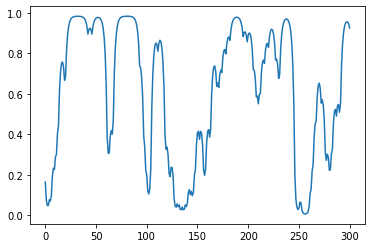

viterbi


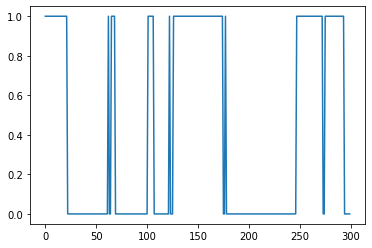

In [98]:
from pylab import *
print("posterior")
#posterior
x = array(post)
plot(x)
show() 
print("viterbi")
#viterbi
y = array(piv)
plot(y)
show()

Implement Baum-Welch training.
Baum Welch works in the following way.

For each sequence in the training set of sequences.

Calculate forward probabilities with the forward algorithm

Calculate backward probabilities with the backward algorithm

Calculate the contributions of the current sequence to the transitions of the model, calculate the contributions of the current sequence to the emission probabilities of the model.

Calculate the new model parameters (start probabilities, transition probabilities, emission probabilities)

Calculate the new log likelihood of the model
Stop when the change in log likelihood is smaller than a given threshold or when a maximum number of iterations is passed.

In [99]:
import random
a_r = np.array([[0.6, 0.4], [0.3, 0.7]], float)
e_r = np.array([[0.11, 0.22, 0.18, 0.19, 0.1, 0.2], [0.15, 0.2, 0.13, 0.17, 0.25, 0.1]], float)
N = 100
path_bw = np.zeros((N, L), int)
s_bw = np.zeros((N, L), int)
fk_bw = np.zeros((N, 2, L + 1))
bk_bw = np.zeros((N, 2, L + 1))
apstr_bw = np.zeros((N, L + 1))
for i in range(N):
    path_bw[i], s_bw[i] = HMM(e, a, L)

In [100]:
for j in range(N):
    A00 = int(0)
    A01 = int(0)
    A10 = int(0)
    A11 = int(0)
    E00 = int(0)
    E01 = int(0)
    E02 = int(0)
    E03 = int(0)
    E04 = int(0)
    E05 = int(0)
    E10 = int(0)
    E11 = int(0)
    E12 = int(0)
    E13 = int(0)
    E14 = int(0)
    E15 = int(0)
    fk_bw[j] = forward(e_r, a_r, path_bw[j], L)
    bk_bw[j] = backward(e_r, a_r, path_bw[j], L)
    apstr_bw[j] = posterior(fk_bw[j], bk_bw[j], L)
    print(apstr_bw[j])
    for i in range(L):
        if (apstr_bw[j][i] > 0.5) and (apstr_bw[j][i+1] > 0.5):
            A00 = A00 + 1
        elif (apstr_bw[j][i] > 0.5) and (apstr_bw[j][i+1] <= 0.5):
            A01 = A01 + 1
        elif (apstr_bw[j][i] <= 0.5) and (apstr_bw[j][i+1] > 0.5):
            A10 = A10 + 1
        else:
            A11 = A11 + 1
        if apstr_bw[j][i] > 0.5:    
            if path_bw[j][i] == 1:
                E00 = E00 + 1
            if path_bw[j][i] == 2:
                E01 = E01 + 1
            if path_bw[j][i] == 3:
                E02 = E02 + 1
            if path_bw[j][i] == 4:
                E03 = E03 + 1
            if path_bw[j][i] == 5:
                E04 = E04 + 1
            if path_bw[j][i] == 6:
                E05 = E05 + 1
        else:    
            if path_bw[j][i] == 1:
                E10 = E10 + 1
            if path_bw[j][i] == 2:
                E11 = E11 + 1
            if path_bw[j][i] == 3:
                E12 = E12 + 1
            if path_bw[j][i] == 4:
                E13 = E13 + 1
            if path_bw[j][i] == 5:
                E14 = E14 + 1
            if path_bw[j][i] == 6:
                E15 = E15 + 1
    sumA0 = A00 + A01
    sumA1 = A10 + A11
    print(A00, A01, A10, A11)
    if sumA0 != 0:
        a_r[0][0] = (a_r[0][0] + (A00 / sumA0)) / 2
        a_r[0][1] = (a_r[0][1] + (A01 / sumA0)) / 2
    else:
        a_r[0][0] = a_r[0][0]
        a_r[0][1] = a_r[0][1]
    if sumA1 != 0:
        a_r[1][0] = (a_r[1][0] + (A10 / sumA1)) / 2
        a_r[1][1] = (a_r[1][1] + (A11 / sumA1)) / 2
    else:
        a_r[1][0] = a_r[1][0]
        a_r[1][1] = a_r[1][1] 
    sumE0 = E00 + E01 + E02 + E03 + E04 + E05
    sumE1 = E10 + E11 + E12 + E13 + E14 + E15
    if sumE0 != 0:
        e_r[0][0] = (e_r[0][0] + (E00/sumE0)) / 2
        e_r[0][1] = (e_r[0][1] + (E01/sumE0)) / 2
        e_r[0][2] = (e_r[0][2] + (E02/sumE0)) / 2
        e_r[0][3] = (e_r[0][3] + (E03/sumE0)) / 2
        e_r[0][4] = (e_r[0][4] + (E04/sumE0)) / 2
        e_r[0][5] = (e_r[0][5] + (E05/sumE0)) / 2
    else:
        e_r[0][0] = e_r[0][0]
        e_r[0][1] = e_r[0][1]
        e_r[0][2] = e_r[0][2]
        e_r[0][3] = e_r[0][3]
        e_r[0][4] = e_r[0][4]
        e_r[0][5] = e_r[0][5]
    if sumE1 != 0:
        e_r[1][0] = (e_r[1][0] + (E10/sumE1)) / 2
        e_r[1][1] = (e_r[1][1] + (E11/sumE1)) / 2
        e_r[1][2] = (e_r[1][2] + (E12/sumE1)) / 2
        e_r[1][3] = (e_r[1][3] + (E13/sumE1)) / 2
        e_r[1][4] = (e_r[1][4] + (E14/sumE1)) / 2
        e_r[1][5] = (e_r[1][5] + (E15/sumE1)) / 2
    else:
        e_r[1][0] = e_r[1][0]
        e_r[1][1] = e_r[1][1]
        e_r[1][2] = e_r[1][2]
        e_r[1][3] = e_r[1][3]
        e_r[1][4] = e_r[1][4]
        e_r[1][5] = e_r[1][5]
print(e_r, a_r)

[0.6710414  0.64479299 0.65159327 0.51030367 0.41800654 0.540426
 0.59869442 0.68844007 0.7005953  0.65967318 0.48314741 0.32475983
 0.21978318 0.36225761 0.31529373 0.2989056  0.28183659 0.23153147
 0.46588735 0.51536146 0.46114911 0.38883816 0.4805066  0.41274217
 0.24925811 0.41119042 0.47487076 0.54249645 0.55009466 0.66992409
 0.67624996 0.58182943 0.49075355 0.42914278 0.29812119 0.17022166
 0.15009035 0.17001892 0.29703383 0.42493472 0.46469484 0.48003296
 0.49552964 0.54795582 0.54929561 0.50174785 0.48914701 0.50320959
 0.55456215 0.28329818 0.42483396 0.47813767 0.52863275 0.49681615
 0.49203897 0.51856174 0.61894951 0.51312649 0.46059867 0.38908168
 0.48197888 0.59044893 0.44198641 0.23351626 0.31212756 0.41774282
 0.26510661 0.47863454 0.52782071 0.49338789 0.31882604 0.18846369
 0.21837358 0.50915264 0.40349905 0.48747185 0.58374627 0.6863669
 0.70696022 0.6870561  0.58651457 0.49696828 0.2714567  0.42801112
 0.51354085 0.49234062 0.49100987 0.50741598 0.56785105 0.6094118

1 1 0 298
[4.91957730e-01 8.06479348e-01 2.74586939e-01 3.04385549e-02
 3.90708356e-05 9.05988820e-04 3.25292811e-04 8.22091718e-05
 3.29744961e-04 9.45311894e-04 1.54639070e-04 1.33296226e-03
 1.54312209e-03 1.46454254e-03 5.10033670e-04 8.09219444e-04
 1.19670963e-04 7.36315898e-04 8.31269011e-05 1.45403326e-06
 2.29811602e-06 1.13668907e-03 1.62241702e-03 1.33889204e-03
 1.03022667e-04 2.26939563e-06 9.44100568e-04 9.39263394e-04
 1.54635559e-04 1.33975644e-03 1.56444006e-03 1.52270018e-03
 1.40285249e-03 1.07481813e-03 2.36456618e-06 9.08662023e-05
 9.69882645e-04 1.12939318e-03 9.60903055e-05 1.72871876e-06
 3.14837683e-04 9.19108005e-04 8.91871201e-05 2.24806716e-06
 9.39108432e-04 1.12078610e-03 9.93812452e-05 7.07464687e-05
 2.49948343e-04 2.53478435e-04 1.03288494e-04 9.71419218e-04
 4.64774346e-04 9.71403294e-04 1.03240765e-04 2.52520234e-04
 2.41620251e-04 2.75965798e-06 1.29328447e-03 1.59708543e-03
 1.67082104e-03 1.58396575e-03 1.48660318e-03 5.33266218e-04
 9.30858492e-0

 2.26589941e-03]
0 1 0 299
[6.49120917e-01 6.79745697e-01 5.52368262e-04 2.67131119e-05
 1.12465513e-03 1.94169496e-03 4.75704084e-03 2.19023220e-03
 2.02309292e-03 3.78937253e-03 3.78937409e-06 1.40133713e-03
 3.51104952e-03 5.64812042e-06 1.74696568e-06 1.18547683e-03
 2.31201511e-03 3.92013209e-03 6.01975681e-06 2.70544842e-05
 1.91027884e-03 3.75364543e-03 3.62154580e-05 5.88438571e-06
 3.73414666e-03 1.89794985e-03 2.01068536e-06 3.90121241e-06
 1.33669503e-03 1.27794398e-03 1.26462143e-03 1.25956289e-03
 1.24865710e-03 1.20148135e-03 9.86434500e-04 3.62348236e-06
 5.65147866e-06 3.51148554e-03 1.40230474e-03 7.18981690e-06
 2.88482046e-03 5.14652473e-06 2.84942271e-06 2.47068357e-05
 1.44240146e-03 1.71535148e-03 1.29978038e-03 1.00426330e-03
 4.42801588e-06 7.71366200e-04 3.44621927e-06 1.30617321e-06
 1.30537921e-06 1.30577555e-06 2.37461788e-06 2.88265754e-03
 5.14476321e-06 2.83369562e-06 5.15543108e-06 2.89592939e-03
 3.19211449e-05 2.40127463e-06 2.89868585e-03 4.08155797e-

 2.49238639e-06]
0 1 1 298
[1.71603126e+00 3.16345414e-02 9.63350789e-05 3.44350955e-04
 4.36315093e-05 7.22230680e-03 7.22232393e-03 4.36988971e-05
 3.64963404e-04 8.98346166e-04 3.11750525e-05 8.77165349e-04
 2.99266046e-05 3.42286499e-04 2.96936243e-05 7.69249156e-04
 5.39331926e-03 4.90057714e-05 3.48078177e-03 6.39475495e-03
 8.10112369e-04 3.18030729e-05 1.24690338e-03 5.87784635e-03
 1.24689633e-03 3.17210195e-05 7.74517770e-04 5.52005387e-03
 4.83211367e-04 2.90759971e-05 3.42240991e-04 2.87716016e-05
 3.42215730e-04 2.80920052e-05 2.74526579e-05 3.82975452e-05
 5.18328504e-03 3.97017304e-05 5.05194504e-04 6.36103886e-03
 3.68762729e-03 1.10921694e-03 4.17630075e-05 5.30860221e-03
 4.77981193e-04 3.46991182e-05 2.92592783e-03 2.92587987e-03
 3.43881071e-05 3.57263267e-04 6.08398954e-04 1.08865975e-03
 2.70258174e-03 4.49529817e-04 1.29543555e-03 6.07357674e-03
 1.87001761e-03 7.14117186e-03 4.92169783e-03 6.56930868e-03
 4.23012849e-05 3.69547057e-04 1.07820805e-03 2.81330923e-